# Add mess to Iris dataset

Das Aufnehmen von **Datensätzen aus realen Applikationen** ist immer mit etlichen Problemen verbunden. Messwerte sind mit einem bestimmten **Level von Messrauschen** beaufschlagt. Beim Aufnehmen der Messwerte kann es sporadisch zu Aussetzern der Messsensoren und damit zu **Lücken im Datensatz** kommen. Und bei der Zusammenführung mehrerer Messreihen aus unterschiedlichen Experimenten können **Dopplungen** die Folge sein.

Diese Probleme aus dem realen Messalltag sollen am Beispiel des Iris-Datensatzes gezeigt werden. Leider ist dieser ein wenig "zu perfekt". Daher soll der Datensatz aus didaktischen Gründen in den folgenden Unterabschnitten etwas "verunreinigt" werden.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set font sizes of figure title, axes and labels 
# globally via a rcParams dictionary
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize':   'x-large',
         'axes.titlesize':   'xx-large',
         'xtick.labelsize':  'large',
         'ytick.labelsize':  'large',
         'axes.edgecolor':   '#000000'}
pylab.rcParams.update(params)

In [4]:
# Import Iris dataset for exploration
irisdata_df_orig = pd.read_csv('./datasets/IRIS_flower_dataset_kaggle.csv')

## Add gaussian noise to features

In [10]:
# Get number of rows of the dataset
n_rows = irisdata_df_orig.shape[0]

# Get number of columns of the dataset
# Omit last column with the classnames
n_cols = irisdata_df_orig.shape[1] - 1

n_cols

4

In [134]:
# mean: "centre" of the distribution
# sigma: standard deviation (spread or “width”) of the distribution
mean, sigma = 0, 0.5

# Create noise with the same dimension as the dataset
# Set 'seed' to something, to make the output of the random generator reproducible
np.random.seed(42)
irisdata_np_noise = np.random.normal(mean, sigma, (n_rows, n_cols))

irisdata_np_noise

array([[ 0.24835708, -0.06913215,  0.32384427,  0.76151493],
       [-0.11707669, -0.11706848,  0.78960641,  0.38371736],
       [-0.23473719,  0.27128002, -0.23170885, -0.23286488],
       [ 0.12098114, -0.95664012, -0.86245892, -0.28114376],
       [-0.50641556,  0.15712367, -0.45401204, -0.70615185],
       [ 0.73282438, -0.11288815,  0.0337641 , -0.71237409],
       [-0.27219136,  0.05546129, -0.57549679,  0.18784901],
       [-0.30031934, -0.14584687, -0.30085331,  0.92613909],
       [-0.00674861, -0.52885546,  0.41127246, -0.61042182],
       [ 0.1044318 , -0.97983506, -0.66409302,  0.09843062],
       [ 0.36923329,  0.08568414, -0.05782414, -0.15055185],
       [-0.739261  , -0.3599221 , -0.23031939,  0.52856111],
       [ 0.17180914, -0.88152008,  0.16204198, -0.19254114],
       [-0.338461  ,  0.30583814,  0.51549976,  0.46564006],
       [-0.41960876, -0.15460619,  0.16563172,  0.48777256],
       [-0.23958712, -0.09282949, -0.55316749, -0.59810331],
       [ 0.40626291,  0.

In [135]:
# Select columns 1-4 with all rows
# and convert it to numpy array
irisdata_np_orig = irisdata_df_orig.iloc[:, 0:4].to_numpy()

#irisdata_np_orig

In [136]:
# Add noise to original values
irisdata_np_noised = irisdata_np_orig + irisdata_np_noise

#irisdata_np_noised

In [137]:
# Make a deep copy of original dataframe
irisdata_df_noised = irisdata_df_orig.copy(deep=True)

# Replace values of dataframe with noisy values from array 
irisdata_df_noised.iloc[:, 0:4] = irisdata_np_noised

irisdata_df_noised

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.348357,3.430868,1.723844,0.961515,Iris-setosa
1,4.782923,2.882932,2.189606,0.583717,Iris-setosa
2,4.465263,3.471280,1.068291,-0.032865,Iris-setosa
3,4.720981,2.143360,0.637541,-0.081144,Iris-setosa
4,4.493584,3.757124,0.945988,-0.506152,Iris-setosa
...,...,...,...,...,...
145,6.869248,2.792356,5.516391,3.435346,Iris-virginica
146,6.390933,2.624110,4.770320,1.475078,Iris-virginica
147,6.915168,2.571958,5.235783,1.761171,Iris-virginica
148,6.439490,3.566831,5.918770,2.044992,Iris-virginica


In [138]:
# Define a function to visualize data as pairs plots
def plotPairs(df, title):
    g = sns.pairplot(df, diag_kind="kde", hue='species', 
                     palette='Dark2', height=2.5)

    g.map_lower(sns.kdeplot, levels=4, color=".2")
    # y .. padding between title and plot
    g.fig.suptitle(title, y=1.05)
    plt.show()

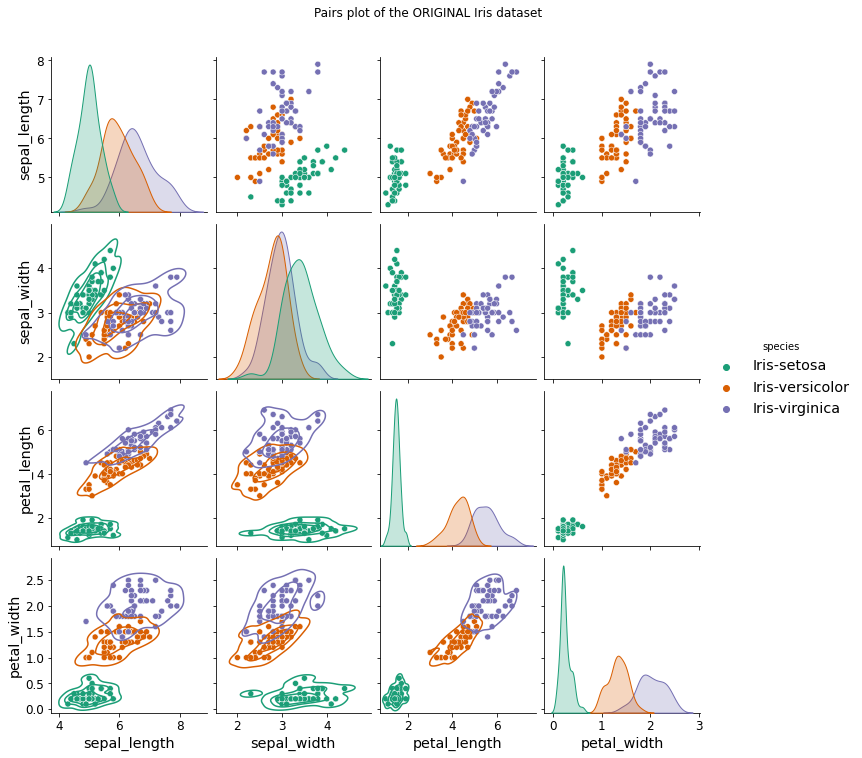

In [139]:
title = 'Pairs plot of the ORIGINAL Iris dataset'
plotPairs(irisdata_df_orig, title)

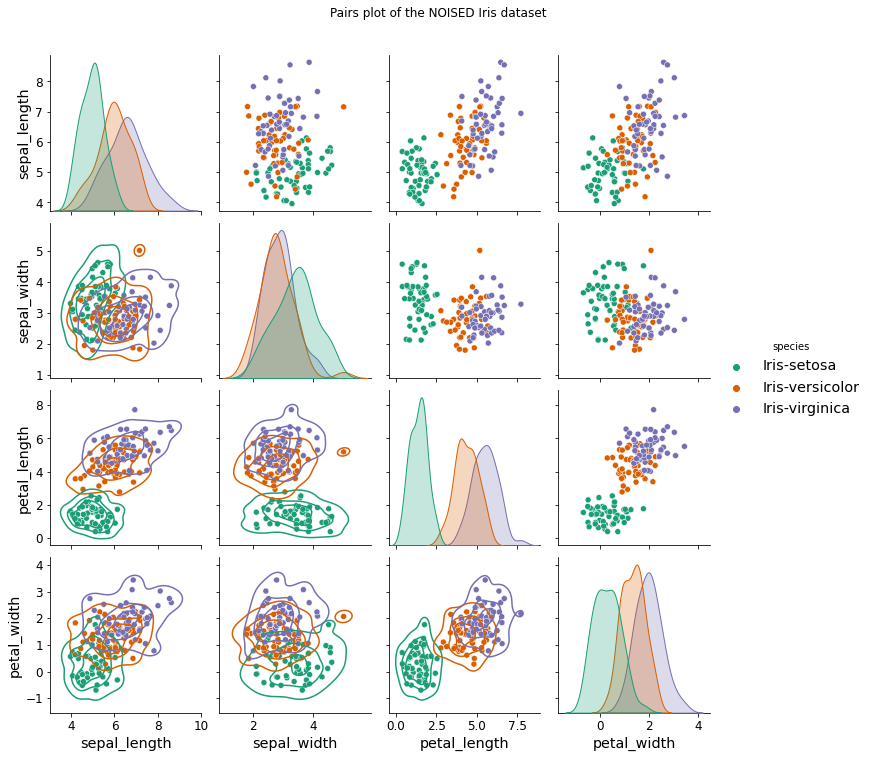

In [140]:
title = 'Pairs plot of the NOISED Iris dataset'
plotPairs(irisdata_df_noised, title)

In [141]:
# Save noised Iris dataset to CSV file without index
irisdata_df_noised.to_csv('./datasets/IRIS_flower_dataset_kaggle_noised.csv', sep=',', index=False)

## Add random gaps

## Add random duplicates